In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import zipfile

with zipfile.ZipFile('/content/drive/My Drive/mega.zip') as z:
  z.extractall('/content/mega')

In [3]:
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
imlist = os.listdir('/content/mega/Mega Data/')

In [7]:
print(imlist)
print(len(imlist))

['zero', 'LeftBrace', 'RightPar', 'phi', 'seven', 'z', 'mu', 'Sigma', 'RightBrace', 'infty', 'theta', 'six', 'gamma', 'Delta', 'plus', 'c', 'minus', 'beta', 'Psi', 'zeta', 'pi', 'three', 'n', 's', 'alpha', 'LeftPar', 't', 'nine', 'Gamma_upper', 'y', 'a', 'four', 'l', 'Pi_upper', 'eight', 'two', 'e', 'five', 'partial', 'prime', 'g', 'x', 'nabla', '.DS_Store', 'omega', 'one']
46


In [8]:
TRAIN_PATH = '/content/mega/Mega Data/'
train_dirs = next(os.walk(TRAIN_PATH))[1]

total_imgs = 0

for train_dir in train_dirs:

  dir_path = TRAIN_PATH + train_dir
  dir_files = next(os.walk(dir_path))[2]

  for dir_file in dir_files:
    
    if dir_file == '.DS_Store':
      continue
       
    total_imgs += 1

print(total_imgs)

22707


In [9]:
import cv2

from tqdm import tqdm

X_train = np.zeros((total_imgs, 64, 64, 1), dtype = np.uint8)
Y_train = np.zeros((total_imgs, 1))

label_to_symbol_dict = {}

label = 0
index = 0
for id_, train_dir in tqdm(enumerate(train_dirs), total = len(train_dirs)):

  label_to_symbol_dict[label] = train_dir

  dir_path = TRAIN_PATH + train_dir + '/'
  dir_files = next(os.walk(dir_path))[2]

  for dir_file in dir_files:

    if dir_file == '.DS_Store':
      continue

    image_path = dir_path + dir_file
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (64, 64))

    gray = np.expand_dims(gray, axis = 2)
    X_train[index] = gray
    Y_train[index] = label

    index += 1

  label += 1

100%|██████████| 45/45 [00:02<00:00, 18.39it/s]


(64, 64)


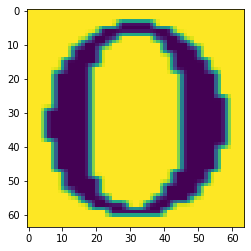

In [10]:
image_test = X_train[0].squeeze()
print(image_test.shape)

plt.imshow(image_test)

In [11]:
print(Y_train[0])

[0.]


In [12]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 45)

print(Y_train.shape)

(22707, 45)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(BatchNormalization(axis = 3))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(BatchNormalization(axis = 3))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Dropout(0.25))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Dropout(0.25))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(axis = 3))
model.add(Dropout(0.25))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.5))
model.add(Dense(45, activation = "softmax"))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_24 (Batc (None, 64, 64, 32)       

In [22]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [23]:
optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor = 'loss', patience = 1, verbose = 1, factor = 0.1)

early_stopper = EarlyStopping(monitor = 'loss', patience = 12, verbose = 1)

history = model.fit(x = X_train, y = Y_train, batch_size = 32, epochs = 20, validation_data = (X_val, Y_val), callbacks = [lr_scheduler, early_stopper], verbose = 2, validation_batch_size = 64)

Epoch 1/20
639/639 - 54s - loss: 0.2602 - accuracy: 0.9336 - val_loss: 0.2534 - val_accuracy: 0.9212 - lr: 0.0010
Epoch 2/20
639/639 - 53s - loss: 0.0310 - accuracy: 0.9927 - val_loss: 0.1117 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 3/20
639/639 - 53s - loss: 0.0243 - accuracy: 0.9943 - val_loss: 0.0683 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 4/20
639/639 - 53s - loss: 0.0225 - accuracy: 0.9939 - val_loss: 0.0488 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 5/20
639/639 - 53s - loss: 0.0221 - accuracy: 0.9941 - val_loss: 0.0287 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 6/20
639/639 - 53s - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.0276 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 7/20

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
639/639 - 53s - loss: 0.0207 - accuracy: 0.9946 - val_loss: 0.0214 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 8/20
639/639 - 53s - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0126 - val_accuracy: 0.9978 - lr: 1.0000e-04
Ep

In [24]:
model.save("monster_model.h5")

In [25]:
import json

with open('mappings_mega.json', 'w') as fp:
    json.dump(label_to_symbol_dict, fp)

In [26]:
with open('mappings_mega.json', 'r') as fp:
    mappings = json.load(fp)

In [27]:
print(mappings)

{'0': 'zero', '1': 'LeftBrace', '2': 'RightPar', '3': 'phi', '4': 'seven', '5': 'z', '6': 'mu', '7': 'Sigma', '8': 'RightBrace', '9': 'infty', '10': 'theta', '11': 'six', '12': 'gamma', '13': 'Delta', '14': 'plus', '15': 'c', '16': 'minus', '17': 'beta', '18': 'Psi', '19': 'zeta', '20': 'pi', '21': 'three', '22': 'n', '23': 's', '24': 'alpha', '25': 'LeftPar', '26': 't', '27': 'nine', '28': 'Gamma_upper', '29': 'y', '30': 'a', '31': 'four', '32': 'l', '33': 'Pi_upper', '34': 'eight', '35': 'two', '36': 'e', '37': 'five', '38': 'partial', '39': 'prime', '40': 'g', '41': 'x', '42': 'nabla', '43': 'omega', '44': 'one'}


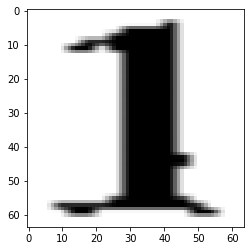

In [34]:
#from PIL import Image

test_img_path = '/content/mega/Mega Data/one/0.png'

test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img = np.array(test_img)
test_img = cv2.resize(test_img,(64,64))

img = np.array(test_img)
plt.imshow(img, cmap = 'gray')
plt.show()

In [35]:
print(test_img.shape)

(64, 64)


In [36]:
test_img = np.expand_dims(test_img, axis = 2)

In [37]:
print(test_img.shape)

(64, 64, 1)


In [38]:
test = np.zeros((1, 64, 64, 1), dtype = np.uint8)

test[0] = test_img

In [39]:
mappings[str(np.argmax(model.predict(test)))]

'one'